# EDA on Gender Classification

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the dataset
data=pd.read_csv('gender-classifier.csv')

In [3]:
# checking the columns and type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

In [4]:
data.size

521300

In [5]:
# Data Cleaning
# Checking for column name consistency
data.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [6]:
# Data Types
data.dtypes

_unit_id                   int64
_golden                     bool
_unit_state               object
_trusted_judgments         int64
_last_judgment_at         object
gender                    object
gender:confidence        float64
profile_yn                object
profile_yn:confidence    float64
created                   object
description               object
fav_number                 int64
gender_gold               object
link_color                object
name                      object
profile_yn_gold           object
profileimage              object
retweet_count              int64
sidebar_color             object
text                      object
tweet_coord               object
tweet_count                int64
tweet_created             object
tweet_id                 float64
tweet_location            object
user_timezone             object
dtype: object

In [7]:
# Checking for Missing Values
data.isnull().sum()

_unit_id                     0
_golden                      0
_unit_state                  0
_trusted_judgments           0
_last_judgment_at           50
gender                      97
gender:confidence           26
profile_yn                   0
profile_yn:confidence        0
created                      0
description               3744
fav_number                   0
gender_gold              20000
link_color                   0
name                         0
profile_yn_gold          20000
profileimage                 0
retweet_count                0
sidebar_color                0
text                         0
tweet_coord              19891
tweet_count                  0
tweet_created                0
tweet_id                     0
tweet_location            7484
user_timezone             7798
dtype: int64

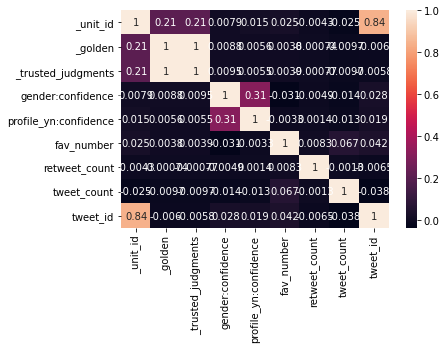

In [8]:
#EDA
sns.heatmap(data.corr(),annot=True)
plt.rcParams['figure.figsize']=20,10

In [9]:
data.corr().transpose()

,_unit_id,_golden,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
_unit_id,1.000000,0.208055,0.207651,0.007918,0.015168,0.024878,-0.004337,-0.024809,0.844887
_golden,0.208055,1.000000,0.998592,0.008818,0.005592,0.003794,-0.000744,-0.009669,-0.005985
_trusted_judgments,0.207651,0.998592,1.000000,0.009550,0.005543,0.003851,-0.000765,-0.009703,-0.005781
gender:confidence,0.007918,0.008818,0.009550,1.000000,0.313628,-0.030889,-0.004947,-0.013558,0.027901
profile_yn:confidence,0.015168,0.005592,0.005543,0.313628,1.000000,-0.003256,0.001376,-0.012665,0.019044
fav_number,0.024878,0.003794,0.003851,-0.030889,-0.003256,1.000000,0.008274,0.066733,0.041788
retweet_count,-0.004337,-0.000744,-0.000765,-0.004947,0.001376,0.008274,1.000000,-0.001263,-0.006466
tweet_count,-0.024809,-0.009669,-0.009703,-0.013558,-0.012665,0.066733,-0.001263,1.000000,-0.037836
tweet_id,0.844887,-0.005985,-0.005781,0.027901,0.019044,0.041788,-0.006466,-0.037836,1.000000


In [10]:
data['gender:confidence'].value_counts()

1.0000    13926
0.0000       71
0.6691       31
0.6591       30
0.6667       30
          ...  
0.3553        1
0.3552        1
0.3393        1
0.6936        1
0.3381        1
Name: gender:confidence, Length: 923, dtype: int64

In [11]:
data=data[data['gender:confidence']>=0.99]

In [12]:
data['gender:confidence'].value_counts()

1.0    13926
Name: gender:confidence, dtype: int64

In [13]:
data['gender'].value_counts()

female     5367
male       4653
brand      3784
unknown     122
Name: gender, dtype: int64

<AxesSubplot:>

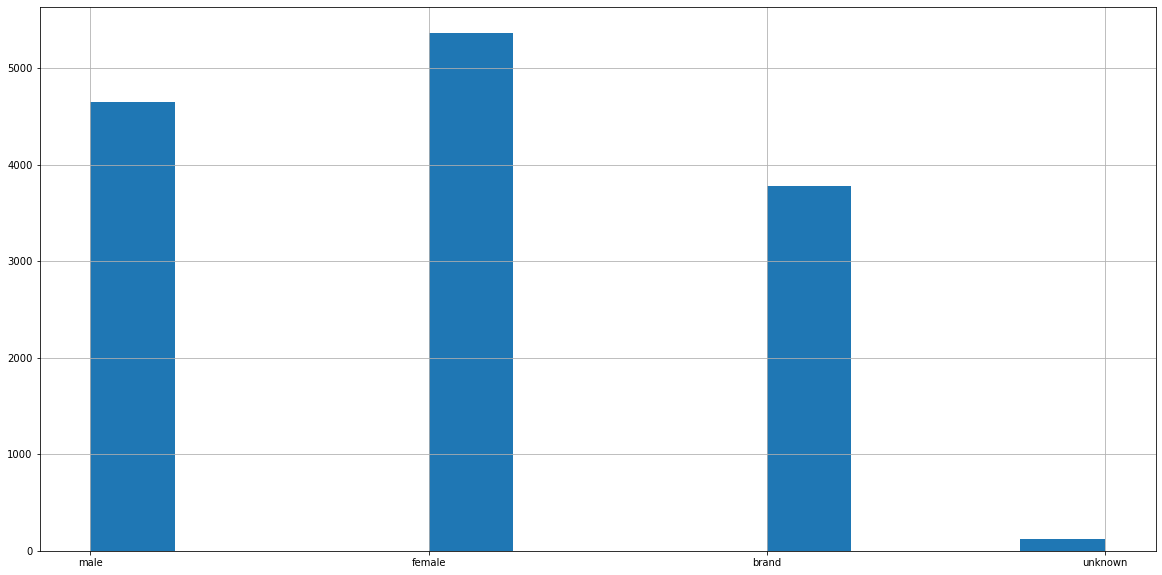

In [14]:
data['gender'].hist(bins=12)

In [15]:
#filling missing values
data['gender'].describe()

count      13926
unique         4
top       female
freq        5367
Name: gender, dtype: object

In [16]:
data['gender'].fillna(data['gender'].mode()[0])

0          male
1          male
3          male
4        female
5        female
          ...  
20044    female
20045    female
20046      male
20047      male
20049    female
Name: gender, Length: 13926, dtype: object

In [17]:
data.shape

(13926, 26)

In [18]:
data['gender'].isnull().sum()

0

In [19]:
# Replacing unknown values
data['gender'].replace(to_replace='unknown',value='male',inplace=True)

In [20]:
data['gender'].value_counts()

female    5367
male      4775
brand     3784
Name: gender, dtype: int64

In [21]:
data['retweet_count'].value_counts()

0      13456
1        381
2         42
3         15
6          7
5          4
7          4
4          4
8          2
12         2
20         2
10         2
36         1
11         1
13         1
153        1
15         1
Name: retweet_count, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='tweet_count'>

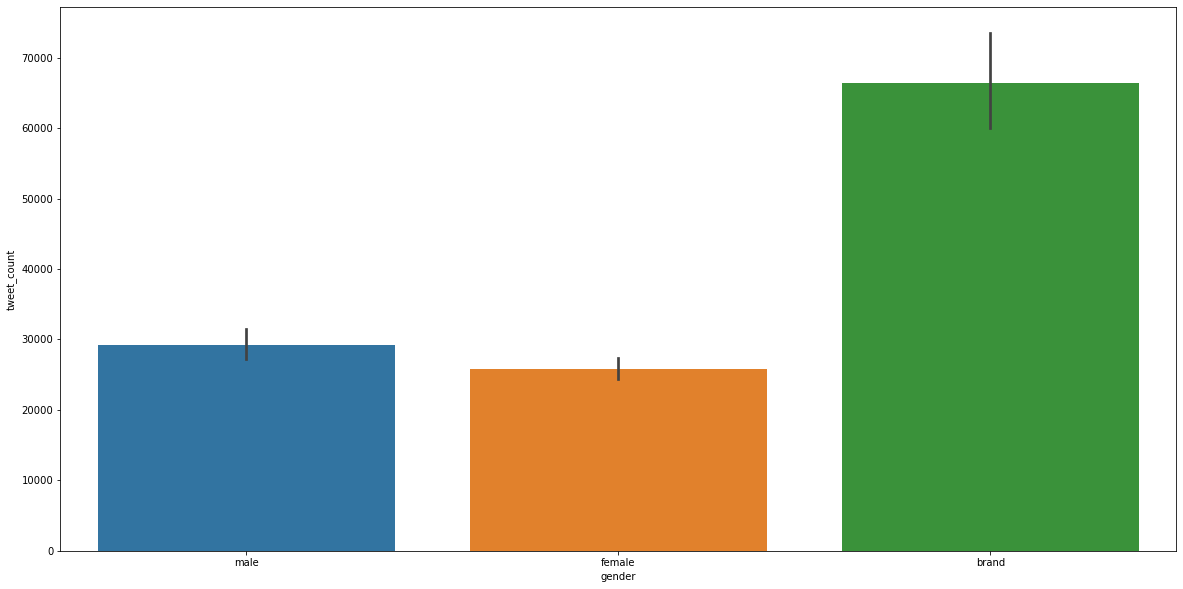

In [22]:
sns.barplot (x = 'gender', y = 'tweet_count',data = data)

<AxesSubplot:xlabel='gender', ylabel='retweet_count'>

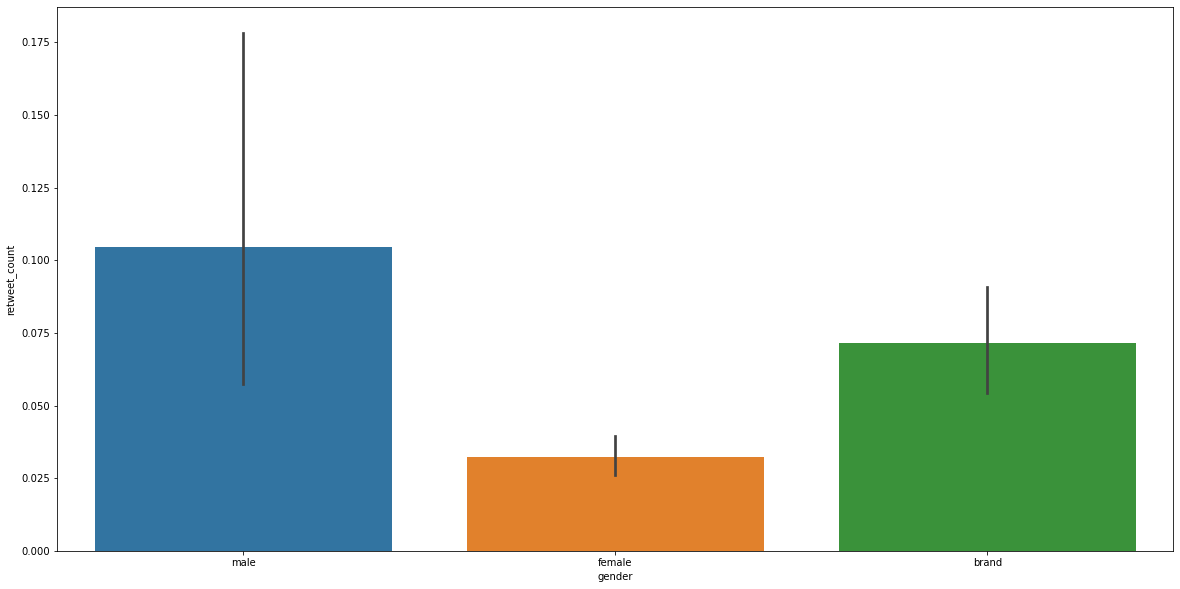

In [23]:
sns.barplot (x = 'gender', y = 'retweet_count',data = data)